In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

# 1. Загрузка датасета

In [2]:
!pip install datasets  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.3 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset
dataset = load_dataset('cifar100')

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:325: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to /root/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

# 2. Описание датасета, постановка задачи, примеры

### Датасет cifar100 содержит изображения, набор состоит из 60000 изображений размером 32 на 32 в 100 классах - 600 изображений в каждом классе.

In [4]:
labels_map = {
        0: 'apple',  
        1: 'aquarium_fish',
        2: 'baby',
        3: 'bear',
        4: 'beaver',
        5: 'bed',
        6: 'bee',
        7: 'beetle',
        8: 'bicycle',
        9: 'bottle',
        10: 'bowl',
        11: 'boy',
        12: 'bridge',
        13: 'bus',
        14: 'butterfly',
        15: 'camel',
        16: 'can',
        17: 'castle',
        18: 'caterpillar',
        19: 'cattle',
        20: 'chair',
        21: 'chimpanzee',
        22: 'clock',
        23: 'cloud',
        24: 'cockroach',
        25: 'couch',
        26: 'crab',
        27: 'crocodile',
        28: 'cup',
        29: 'dinosaur',
        30: 'dolphin',
        31: 'elephant',
        32: 'flatfish',
        33: 'forest',
        34: 'fox',
        35: 'girl',
        36: 'hamster',
        37: 'house',
        38: 'kangaroo',
        39: 'computer_keyboard',
        40: 'lamp',
        41: 'lawn_mower',
        42: 'leopard',
        43: 'lion',
        44: 'lizard',
        45: 'lobster',
        46: 'man',
        47: 'maple_tree',
        48: 'motorcycle',
        49: 'mountain',
        50: 'mouse',
        51: 'mushroom',
        52: 'oak_tree',
        53: 'orange',
        54: 'orchid',
        55: 'otter',
        56: 'palm_tree',
        57: 'pear',
        58: 'pickup_truck',
        59: 'pine_tree',
        60: 'plain',
        61: 'plate',
        62: 'poppy',
        63: 'porcupine',
        64: 'possum',
        65: 'rabbit',
        66: 'raccoon',
        67: 'ray',
        68: 'road',
        69: 'rocket',
        70: 'rose',
        71: 'sea',
        72: 'seal',
        73: 'shark',
        74: 'shrew',
        75: 'skunk',
        76: 'skyscraper',
        77: 'snail',
        78: 'snake',
        79: 'spider',
        80: 'squirrel',
        81: 'streetcar',
        82: 'sunflower',
        83: 'sweet_pepper',
        84: 'table',
        85: 'tank',
        86: 'telephone',
        87: 'television',
        88: 'tiger',
        89: 'tractor',
        90: 'train',
        91: 'trout',
        92: 'tulip',
        93: 'turtle',
        94: 'wardrobe',
        95: 'whale',
        96: 'willow_tree',
        97: 'wolf',
        98: 'woman',
        99: 'worm',
}

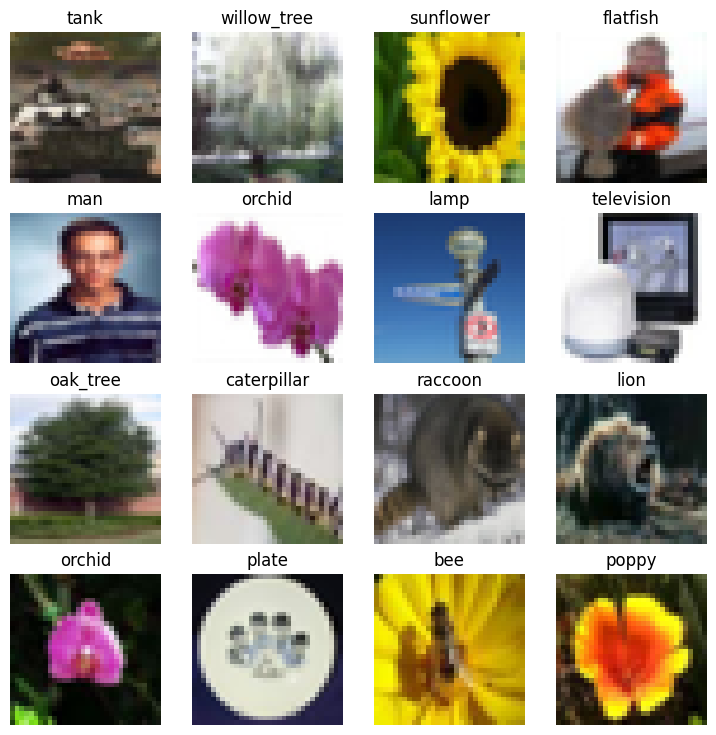

In [5]:
figure = plt.figure(figsize=(9, 9))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset['train']['img']), size=(1,)).item()
    img, label = dataset['train'][sample_idx]['img'], dataset['train'][sample_idx]['fine_label']
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 3. Оформление датасета в виде объекта класса Dataset из PyTorch.

In [6]:
from matplotlib import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
  def __init__(self, data, transforms):
      self.data = data
      self.transform = transforms

  def __len__(self):
      return len(self.data)
  
  def __getitem__(self, idx):
      images = self.transform(self.data[idx]['img'])
      labels = self.data[idx]['fine_label']

      return images, labels

In [7]:
apply_transforms = {
    'train':
    transforms.Compose([
        transforms.RandomHorizontalFlip(0.5), 
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'test':
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [8]:
dataset_train_before_splitting = CustomDataset(dataset['train'], apply_transforms['train'])
dataset_test = CustomDataset(dataset['test'], apply_transforms['test'])

In [10]:
train_len, val_len = int(0.75*len(dataset_train_before_splitting)), int(0.25*len(dataset_train_before_splitting))

In [11]:
dataset_train, dataset_val = torch.utils.data.random_split(dataset_train_before_splitting, [train_len, val_len])
dataset = {'train': dataset_train, 'val': dataset_val, 'test': dataset_test}

# 4. Оформление датасета в Dataloader.

In [12]:
dataloader_train = DataLoader(dataset['train'], batch_size=32, shuffle=True, num_workers=0)
dataloader_val = DataLoader(dataset['val'], batch_size=32, shuffle=True, num_workers=0)
dataloader_test = DataLoader(dataset['test'], batch_size=32, shuffle=False, num_workers=0)

In [13]:
dataloaders = {'train': dataloader_train, 'val': dataloader_val,'test': dataloader_test}

# 5. Реализация архитектуры собственной нейросети и тренировка её.

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [15]:
import time
import copy
def train_model(model, dataloader, criterion, optimizer, scheduler, epochs=20):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch+1, epochs))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataset[phase])
            epoch_acc = running_corrects.double() / len(dataset[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [17]:
inputs, classes = next(iter(dataloaders['train']))

In [19]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
model = nn.Sequential(
    nn.Conv2d(3, 8, 3, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3),
    nn.Conv2d(8, 32, 3, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3),
    nn.Conv2d(32, 64, 2),

    nn.Flatten(),

    nn.Linear(576, 100)
)

out = model(inputs)
model = model.to(device)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0025, momentum=0.9)
scheduler = optim.Adagrad(model.parameters(), lr=0.0001, weight_decay=0.0001)

In [21]:
model = train_model(model, dataloaders ,criterion, optimizer, scheduler, epochs=10)

Epoch 1/10
----------
train Loss: 4.0997 Acc: 0.0835
val Loss: 3.6401 Acc: 0.1492

Epoch 2/10
----------
train Loss: 3.3885 Acc: 0.1983
val Loss: 3.1851 Acc: 0.2355

Epoch 3/10
----------
train Loss: 3.0463 Acc: 0.2633
val Loss: 2.9425 Acc: 0.2873

Epoch 4/10
----------
train Loss: 2.8321 Acc: 0.3094
val Loss: 2.8559 Acc: 0.3095

Epoch 5/10
----------
train Loss: 2.7038 Acc: 0.3345
val Loss: 2.7013 Acc: 0.3341

Epoch 6/10
----------
train Loss: 2.6018 Acc: 0.3526
val Loss: 2.6661 Acc: 0.3430

Epoch 7/10
----------
train Loss: 2.5361 Acc: 0.3670
val Loss: 2.6483 Acc: 0.3475

Epoch 8/10
----------
train Loss: 2.4688 Acc: 0.3812
val Loss: 2.6015 Acc: 0.3582

Epoch 9/10
----------
train Loss: 2.4258 Acc: 0.3903
val Loss: 2.6176 Acc: 0.3534

Epoch 10/10
----------
train Loss: 2.3802 Acc: 0.3994
val Loss: 2.5647 Acc: 0.3674

Training complete in 8m 11s
Best val Acc: 0.367440


# 6. Обучение нейросети Transfer Learning. 

In [22]:
model_fitted = models.resnet50(pretrained=True)

model_fitted = model_fitted.to(device)

num_fts = model_fitted.fc.in_features
model_fitted.fc = nn.Linear(num_fts, 100)

model_fitted.fc = model_fitted.fc.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 353MB/s]


In [23]:
from torch.optim import lr_scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_fitted.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [24]:
model_fitted = train_model(model_fitted, dataloaders ,criterion, optimizer, scheduler, epochs=10)

Epoch 1/10
----------
train Loss: 2.8472 Acc: 0.2986
val Loss: 1.9907 Acc: 0.4602

Epoch 2/10
----------
train Loss: 1.8749 Acc: 0.4905
val Loss: 1.7416 Acc: 0.5253

Epoch 3/10
----------
train Loss: 1.5451 Acc: 0.5669
val Loss: 1.6102 Acc: 0.5557

Epoch 4/10
----------
train Loss: 1.1510 Acc: 0.6721
val Loss: 1.4512 Acc: 0.5935

Epoch 5/10
----------
train Loss: 1.0449 Acc: 0.7002
val Loss: 1.4135 Acc: 0.6045

Epoch 6/10
----------
train Loss: 0.9768 Acc: 0.7151
val Loss: 1.4029 Acc: 0.6107

Epoch 7/10
----------
train Loss: 0.9174 Acc: 0.7349
val Loss: 1.4037 Acc: 0.6093

Epoch 8/10
----------
train Loss: 0.9200 Acc: 0.7342
val Loss: 1.4036 Acc: 0.6104

Epoch 9/10
----------
train Loss: 0.9083 Acc: 0.7374
val Loss: 1.3834 Acc: 0.6163

Epoch 10/10
----------
train Loss: 0.8969 Acc: 0.7413
val Loss: 1.3956 Acc: 0.6103

Training complete in 13m 38s
Best val Acc: 0.616320


# 7. Получение метрик качества финальной модели. Выводы.

In [25]:
def class_accuracy(net, testloader):
    class_correct = list(0. for i in range(100))
    class_total = list(0. for i in range(100))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(16):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(100):
        print('Accuracy of {} : {} %'.format(
            i, 100 * class_correct[i] / class_total[i]))

In [26]:
def all_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(
        100 * correct / total))

In [27]:
all_accuracy(model, dataloaders['test'])

Accuracy of the network on the 10000 test images: 36.63 %


In [28]:
all_accuracy(model_fitted, dataloaders['test'])

Accuracy of the network on the 10000 test images: 60.53 %


In [29]:
class_accuracy(model, dataloaders['test'])

Accuracy of 0 : 73.91304347826087 %
Accuracy of 1 : 63.63636363636363 %
Accuracy of 2 : 20.454545454545453 %
Accuracy of 3 : 8.620689655172415 %
Accuracy of 4 : 31.372549019607842 %
Accuracy of 5 : 50.0 %
Accuracy of 6 : 44.23076923076923 %
Accuracy of 7 : 32.69230769230769 %
Accuracy of 8 : 49.01960784313726 %
Accuracy of 9 : 56.60377358490566 %
Accuracy of 10 : 25.58139534883721 %
Accuracy of 11 : 11.363636363636363 %
Accuracy of 12 : 43.63636363636363 %
Accuracy of 13 : 24.489795918367346 %
Accuracy of 14 : 42.857142857142854 %
Accuracy of 15 : 12.962962962962964 %
Accuracy of 16 : 28.0 %
Accuracy of 17 : 68.75 %
Accuracy of 18 : 23.91304347826087 %
Accuracy of 19 : 38.775510204081634 %
Accuracy of 20 : 67.56756756756756 %
Accuracy of 21 : 43.18181818181818 %
Accuracy of 22 : 12.76595744680851 %
Accuracy of 23 : 64.40677966101696 %
Accuracy of 24 : 58.92857142857143 %
Accuracy of 25 : 20.0 %
Accuracy of 26 : 21.153846153846153 %
Accuracy of 27 : 20.689655172413794 %
Accuracy of 28 :

##### Вывод - точность модели на основе собственной архитектуры нейронной: 36.63%, но благодаря использованию transfer learning: 60.53%, таким образом модель transfer learning показала лучшие показатели метрик.